In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"E:\Praxis-BA-18\Term-1\ML\hackathan-AV-15.5.18\train.csv")

In [3]:
data.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,26.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,30.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,45.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,43.0,2,N,4.0,1


In [4]:
data1=data.drop('id',axis=1)

In [5]:
data1.head()

,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,26.0,5,N,1.0,0
1,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,30.0,2,N,3.0,1
2,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,45.0,1,N,2.0,1
3,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,43.0,2,N,4.0,1


In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [7]:
data1['test_type']=le.fit_transform(data1['test_type'])
data1['difficulty_level']=le.fit_transform(data1['difficulty_level'])
data1['gender']=le.fit_transform(data1['gender'])
data1['education']=le.fit_transform(data1['education'])
data1['city_tier']=le.fit_transform(data1['city_tier'])
data1['is_handicapped']=le.fit_transform(data1['is_handicapped'])
data1['program_id']=le.fit_transform(data1['program_id'])
data1['program_type']=le.fit_transform(data1['program_type'])

In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73147 entries, 0 to 73146
Data columns (total 15 columns):
program_id                   73147 non-null int64
program_type                 73147 non-null int64
program_duration             73147 non-null int64
test_id                      73147 non-null int64
test_type                    73147 non-null int64
difficulty_level             73147 non-null int64
trainee_id                   73147 non-null int64
gender                       73147 non-null int64
education                    73147 non-null int64
city_tier                    73147 non-null int64
age                          67303 non-null float64
total_programs_enrolled      73147 non-null int64
is_handicapped               73147 non-null int64
trainee_engagement_rating    73070 non-null float64
is_pass                      73147 non-null int64
dtypes: float64(2), int64(13)
memory usage: 8.4 MB


In [9]:
import missingno as mn
import fancyimpute
from sklearn.preprocessing import Imputer

Using TensorFlow backend.


In [14]:
fai=fancyimpute.MICE(verbose=False)

In [15]:
df=fai.complete(data1)

In [16]:
data_tr=pd.DataFrame(df)

In [17]:
var=['program_id','program_type','program_duration','test_id','test_type','difficulty_level','trainee_id','gender','education','city_tier','age','total_programs_enrolled','is_handicapped','trainee_engagement_rating','is_pass']

In [18]:
data_tr.columns=var

In [19]:
data_tr.isnull().sum()

program_id                   0
program_type                 0
program_duration             0
test_id                      0
test_type                    0
difficulty_level             0
trainee_id                   0
gender                       0
education                    0
city_tier                    0
age                          0
total_programs_enrolled      0
is_handicapped               0
trainee_engagement_rating    0
is_pass                      0
dtype: int64

In [20]:
x=data_tr.drop('is_pass',axis=1)
y=data_tr.loc[:,'is_pass']

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=45)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, cohen_kappa_score, accuracy_score,roc_auc_score
rf = RandomForestClassifier(n_estimators=150,criterion='entropy', min_samples_leaf=5)
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(X=x_test)
y_pred_rf
print(accuracy_score(y_test,y_pred_rf))
print(roc_auc_score(y_test,y_pred_rf))

0.735816814764
0.623417365415


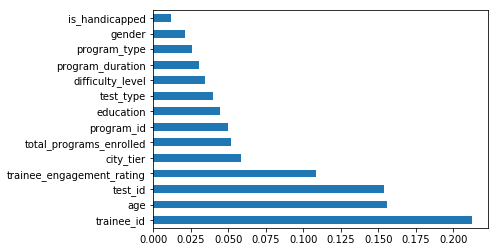

In [23]:
feature_importance = pd.Series(rf.feature_importances_,index=x_train.columns[0:46])
feature_importance = feature_importance.nlargest(15)
import matplotlib.pyplot as plt
%matplotlib inline
feature_importance.plot(kind='barh')

In [24]:
data_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73147 entries, 0 to 73146
Data columns (total 15 columns):
program_id                   73147 non-null float64
program_type                 73147 non-null float64
program_duration             73147 non-null float64
test_id                      73147 non-null float64
test_type                    73147 non-null float64
difficulty_level             73147 non-null float64
trainee_id                   73147 non-null float64
gender                       73147 non-null float64
education                    73147 non-null float64
city_tier                    73147 non-null float64
age                          73147 non-null float64
total_programs_enrolled      73147 non-null float64
is_handicapped               73147 non-null float64
trainee_engagement_rating    73147 non-null float64
is_pass                      73147 non-null float64
dtypes: float64(15)
memory usage: 8.4 MB


# Without creating dummy variable

In [25]:
data2=data_tr.loc[:,['trainee_id','age','test_id','trainee_engagement_rating','city_tier','total_programs_enrolled','program_id','education','test_type','difficulty_level','program_duration']]

In [26]:
x=data2
y=data_tr.loc[:,'is_pass']

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=45)

In [28]:
rf = RandomForestClassifier(n_estimators=150,criterion='entropy', min_samples_leaf=5,class_weight='balanced')
rf.fit(x_train,y_train)
y_pred=rf.predict(X=x_test)
y_pred
print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

0.715721120984
0.683736497437


In [34]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_imb_pipeline
rf1=RandomForestClassifier(warm_start=True,n_estimators=80,max_depth=9,max_features = 10, criterion = 'entropy')
smote_pipe_rf = make_imb_pipeline(SMOTE(), rf1)

In [35]:
smote_pipe_rf.fit(x_train,y_train)
y_pred_sm=smote_pipe_rf.predict(x_test)
print(accuracy_score(y_test,y_pred_sm))
print(roc_auc_score(y_test,y_pred_sm))

0.707792207792
0.629449157618


In [36]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
kfold = model_selection.KFold(n_splits=10, random_state=10)
cart = DecisionTreeClassifier(class_weight='balanced')
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=100,bootstrap=True, random_state=10)
model1=make_imb_pipeline(SMOTE(),model)


In [37]:
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(roc_auc_score(y_test,y_pred1))

0.727751196172
0.652944712484


In [38]:
model.fit(x_train,y_train)
y_pred_bg=model.predict(x_test)
print(accuracy_score(y_test,y_pred_bg))
print(roc_auc_score(y_test,y_pred_bg))

0.735885167464
0.64912756206


In [39]:
param_grid = {'smote__k_neighbors': [3, 5, 7, 9, 11, 15, 31]}
search = GridSearchCV(model1, param_grid, cv=10, scoring="roc_auc")
search.fit(x_train,y_train)
y_pred_gr=model.predict(x_test)
print(accuracy_score(y_test,y_pred_gr))
print(roc_auc_score(y_test,y_pred_gr))

NameError: name 'GridSearchCV' is not defined

In [40]:
from imblearn.over_sampling import SMOTE

In [41]:
sm=SMOTE(random_state=10,ratio=1.0)

In [42]:
x,y=sm.fit_sample(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=45)

In [87]:
x_train.shape

(81387, 11)

In [44]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
kfold = model_selection.KFold(n_splits=10, random_state=10)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=100,bootstrap=True, random_state=10)
results = model_selection.cross_val_score(model, x, y, cv=kfold).mean()
results

0.81095080273447473

In [45]:
model.fit(x_train,y_train)
y_pred=model.predict(X=x_test)
print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

0.806408807195
0.806403723281


In [46]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedShuffleSplit

In [56]:
param_grid={}
grid=GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, scoring='roc_auc', cv=StratifiedShuffleSplit(100))

In [57]:
grid.fit(x_train,y_train)
y_pred_grid=grid.predict(x_test)

In [58]:
print(accuracy_score(y_test,y_pred_grid))
print(roc_auc_score(y_test,y_pred_grid))

0.755246473682
0.755247729229


In [59]:
rf.fit(x_train,y_train)
y_pred=rf.predict(X=x_test)
y_pred
print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

0.809259350273
0.809249440339


from sklearn.model_selection import cross_val_predict
from sklearn import metrics
pred_cv= cross_val_predict(rf,x_train,y_train, cv=10)
metrics.accuracy_score(y_train, pred_cv)
y_pred_cv=cross_val_predict(rf,x_test,y_test,cv=10)
print(accuracy_score(y_test,y_pred_cv))
print(roc_auc_score(y_test,y_pred_cv))
print(confusion_matrix(y_test,y_pred_cv))
print(cohen_kappa_score(y_test,y_pred_cv))

In [61]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X=x_train, y=y_train)
y_pred_lr=lr_model.predict(X=x_test)
print(y_pred_lr)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_lr))
print(roc_auc_score(y_test,y_pred_lr))

[ 0.  1.  0. ...,  0.  1.  0.]
0.622450484101
0.622454736759


In [62]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
adb=AdaBoostClassifier(base_estimator=cart, n_estimators=50, random_state=10)
adb.fit(X=x_train, y=y_train)
y_pred_adb=adb.predict(X=x_test)
print(roc_auc_score(y_test,y_pred_adb))
print(accuracy_score(y_test,y_pred_adb))
print(confusion_matrix(y_test,y_pred_adb))
print(cohen_kappa_score(y_test,y_pred_adb))
print(accuracy_score(y_test,y_pred_adb))

0.753920889932
0.753919496732
[[7765 2407]
 [2600 7575]]
0.507840359383
0.753919496732


In [63]:
from sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
gbc.fit(x_train, y_train)
y_pred_gbc=gbc.predict(X=x_test)
print(roc_auc_score(y_test,y_pred_gbc))
print(accuracy_score(y_test,y_pred_gbc))
print(confusion_matrix(y_test,y_pred_gbc))
print(cohen_kappa_score(y_test,y_pred_gbc))

0.761081612482
0.76109500172
[[6818 3354]
 [1507 8668]]
0.522177202649


In [ ]:
from sklearn import naive_bayes
nb_classifier = naive_bayes.GaussianNB()
nb_classifier.fit(X=x_train, y=y_train)
y_pred_nb=nb_classifier.predict(X=x_test)
print(roc_auc_score(y_test,y_pred_nb))
print(accuracy_score(y_test,y_pred_nb))
print(confusion_matrix(y_test,y_pred_nb))
print(cohen_kappa_score(y_test,y_pred_nb))
print(accuracy_score(y_test,y_pred_nb))

In [64]:
from sklearn.neighbors import KNeighborsClassifier
classifier_kn = KNeighborsClassifier(n_neighbors=100)  
classifier_kn.fit(x_train, y_train) 
y_pred_knn=classifier_kn.predict(X=x_test)
print(roc_auc_score(y_test,y_pred_knn))
print(accuracy_score(y_test,y_pred_knn))
print(confusion_matrix(y_test,y_pred_knn))
print(cohen_kappa_score(y_test,y_pred_knn))
print(accuracy_score(y_test,y_pred_knn))

0.581174849106
0.58116675677
[[6470 3702]
 [4820 5355]]
0.162347067722
0.58116675677


In [ ]:
# Voting Ensemble for Classification
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
# create the sub models
estimators = []
##model1 = LogisticRegression()
##estimators.append(('lr',model1))
model2 = DecisionTreeClassifier()
estimators.append(('dt',model2))
##model3=KNeighborsClassifier()
#estimators.append(('kn',model3))
model4=RandomForestClassifier()
estimators.append(('rf',model4))
model5=naive_bayes.GaussianNB()
estimators.append(('nb',model5))
model6=AdaBoostClassifier()
estimators.append(('adb',model6))
model7=GradientBoostingClassifier()
estimators.append(('gb',model7))
print(estimators)
# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(x_train,y_train)
y_pred_vt=ensemble.predict(X=x_test)
results = model_selection.cross_val_score(ensemble, x_train,y_train, cv=kfold)
print(results.mean())
print(roc_auc_score(y_test,y_pred_vt))
print(accuracy_score(y_test,y_pred_vt))


In [ ]:
y_pred_vt=ensemble.predict(X=x_test)
results = model_selection.cross_val_score(ensemble, x_train,y_train, cv=kfold)
print(results.mean())
print(roc_auc_score(y_test,y_pred_vt))
print(accuracy_score(y_test,y_pred_vt))

In [87]:
import xgboost as xgb
from sklearn.grid_search import GridSearchCV

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [103]:
cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
ind_params = {'learning_rate': 0.1, 'n_estimators': 100, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic'}
optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1)

In [104]:
optimized_GBM.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=0.8),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [105]:
optimized_GBM.grid_scores_

[mean: 0.72276, std: 0.00103, params: {'max_depth': 3, 'min_child_weight': 1},
 mean: 0.72268, std: 0.00195, params: {'max_depth': 3, 'min_child_weight': 3},
 mean: 0.72235, std: 0.00126, params: {'max_depth': 3, 'min_child_weight': 5},
 mean: 0.72958, std: 0.00187, params: {'max_depth': 5, 'min_child_weight': 1},
 mean: 0.72953, std: 0.00213, params: {'max_depth': 5, 'min_child_weight': 3},
 mean: 0.72955, std: 0.00209, params: {'max_depth': 5, 'min_child_weight': 5},
 mean: 0.73355, std: 0.00170, params: {'max_depth': 7, 'min_child_weight': 1},
 mean: 0.73438, std: 0.00077, params: {'max_depth': 7, 'min_child_weight': 3},
 mean: 0.73298, std: 0.00147, params: {'max_depth': 7, 'min_child_weight': 5}]

In [106]:
xgdmat = xgb.DMatrix(x_train, y_train)

In [107]:
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic', 'max_depth':3, 'min_child_weight':1} 
final_gb = xgb.train(our_params, xgdmat, num_boost_round = 432)

In [108]:
xgdmat_t=xgb.DMatrix(x_test)

In [109]:
y_pred_xgb=final_gb.predict(xgdmat_t)

In [110]:
y_pred_xgb

array([ 0.74295491,  0.84071231,  0.55110765, ...,  0.74486309,
        0.52520835,  0.94484639], dtype=float32)

In [111]:
y_pred_xgb[y_pred_xgb > 0.5] = 1
y_pred_xgb[y_pred_xgb <= 0.5] = 0
y_pred_xgb

array([ 1.,  1.,  1., ...,  1.,  1.,  1.], dtype=float32)

In [112]:
print(roc_auc_score(y_test,y_pred_xgb))
print(accuracy_score(y_test,y_pred_xgb))

0.615517835108
0.73048530417


# applying on test datset

In [165]:
data_test=pd.read_csv(r"E:\Praxis-BA-18\Term-1\ML\hackathan-AV-15.5.18\test.csv")

In [166]:
d2=pd.read_csv((r"E:\Praxis-BA-18\Term-1\ML\hackathan-AV-15.5.18\test.csv"))

In [167]:
d2.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating
0,1626_45,T_1,T,131,45,offline,intermediate,1626,F,Matriculation,3,50.0,2,N,4.0
1,11020_130,Y_3,Y,135,130,online,easy,11020,M,Bachelors,3,22.0,4,N,4.0
2,12652_146,Y_2,Y,120,146,online,easy,12652,M,Matriculation,3,24.0,2,N,3.0
3,7038_72,V_4,V,122,72,offline,vary hard,7038,F,High School Diploma,1,27.0,2,N,2.0
4,888_71,V_4,V,122,71,offline,intermediate,888,F,Matriculation,3,18.0,2,N,2.0


In [168]:
d2.isnull().sum()

id                              0
program_id                      0
program_type                    0
program_duration                0
test_id                         0
test_type                       0
difficulty_level                0
trainee_id                      0
gender                          0
education                       0
city_tier                       0
age                          2444
total_programs_enrolled         0
is_handicapped                  0
trainee_engagement_rating      31
dtype: int64

In [169]:
d2=d2.drop('id',axis=1)

In [170]:
d2['test_type']=le.fit_transform(d2['test_type'])
d2['difficulty_level']=le.fit_transform(d2['difficulty_level'])
d2['gender']=le.fit_transform(d2['gender'])
d2['education']=le.fit_transform(d2['education'])
d2['city_tier']=le.fit_transform(d2['city_tier'])
d2['is_handicapped']=le.fit_transform(d2['is_handicapped'])
d2['program_id']=le.fit_transform(d2['program_id'])
d2['program_type']=le.fit_transform(d2['program_type'])

In [171]:
df1=fai.complete(d2)

In [172]:
d3=pd.DataFrame(df1)

In [173]:
var1=['program_id','program_type','program_duration','test_id','test_type','difficulty_level','trainee_id','gender','education','city_tier','age','total_programs_enrolled','is_handicapped','trainee_engagement_rating']

In [174]:
d3.columns=var1

In [175]:
d3.head()

,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating
0,2.0,1.0,131.0,45.0,0.0,2.0,1626.0,0.0,3.0,2.0,50.0,2.0,0.0,4.0
1,17.0,5.0,135.0,130.0,1.0,0.0,11020.0,1.0,0.0,2.0,22.0,4.0,0.0,4.0
2,16.0,5.0,120.0,146.0,1.0,0.0,12652.0,1.0,3.0,2.0,24.0,2.0,0.0,3.0
3,11.0,3.0,122.0,72.0,0.0,3.0,7038.0,0.0,1.0,0.0,27.0,2.0,0.0,2.0
4,11.0,3.0,122.0,71.0,0.0,2.0,888.0,0.0,3.0,2.0,18.0,2.0,0.0,2.0


In [176]:
d3.isnull().sum()

program_id                   0
program_type                 0
program_duration             0
test_id                      0
test_type                    0
difficulty_level             0
trainee_id                   0
gender                       0
education                    0
city_tier                    0
age                          0
total_programs_enrolled      0
is_handicapped               0
trainee_engagement_rating    0
dtype: int64

In [177]:
d4=d3.loc[:,['trainee_id','age','test_id','trainee_engagement_rating','city_tier','total_programs_enrolled','program_id','education','test_type','difficulty_level','program_duration']]

In [178]:
d4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31349 entries, 0 to 31348
Data columns (total 11 columns):
trainee_id                   31349 non-null float64
age                          31349 non-null float64
test_id                      31349 non-null float64
trainee_engagement_rating    31349 non-null float64
city_tier                    31349 non-null float64
total_programs_enrolled      31349 non-null float64
program_id                   31349 non-null float64
education                    31349 non-null float64
test_type                    31349 non-null float64
difficulty_level             31349 non-null float64
program_duration             31349 non-null float64
dtypes: float64(11)
memory usage: 2.6 MB


In [149]:
bg_pred=model.predict(d4)

In [179]:
rf_pred=rf.predict(d4)

In [180]:
d4['is_pass']=pd.Series(rf_pred)

In [181]:
data_test['is_pass']=d4.loc[:,['is_pass']]

In [182]:

subm_data=data_test.loc[:,['id','is_pass']]

In [183]:
subm_data.head()

,id,is_pass
0,1626_45,0.0
1,11020_130,1.0
2,12652_146,0.0
3,7038_72,0.0
4,888_71,1.0


In [184]:
subm_data.to_csv(r"E:\Praxis-BA-18\Term-1\ML\hackathan-AV-15.5.18\submission.csv")

# With Dummy variable

In [105]:
data=pd.read_csv(r"E:\Praxis-BA-18\Term-1\ML\hackathan-AV-15.5.18\train.csv")

In [106]:
data1=data.drop('id',axis=1)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [107]:
data1['difficulty_level']=le.fit_transform(data1['difficulty_level'])
data1['gender']=le.fit_transform(data1['gender'])
data1['education']=le.fit_transform(data1['education'])
data1['city_tier']=le.fit_transform(data1['city_tier'])
data1['is_handicapped']=le.fit_transform(data1['is_handicapped'])
data1['program_id']=le.fit_transform(data1['program_id'])
data1['program_type']=le.fit_transform(data1['program_type'])

In [108]:
import missingno as mn
import fancyimpute
from sklearn.preprocessing import Imputer

In [109]:
fai=fancyimpute.MICE(verbose=False)


In [110]:
df=fai.complete(data1)



TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [111]:
data_tr=pd.DataFrame(df)

In [113]:
data_tr=data_tr.apply(np.int64)

In [114]:
var=['program_id','program_type','program_duration','test_id','test_type','difficulty_level','trainee_id','gender','education','city_tier','age','total_programs_enrolled','is_handicapped','trainee_engagement_rating','is_pass']
data_tr.columns=var

In [115]:
data_tr.head()

,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,15,5,136,150,0,2,9389,1,3,2,26,5,0,1,0
1,2,1,131,44,0,0,16523,0,1,3,30,2,0,3,1
2,20,6,120,178,1,0,13987,1,3,0,45,1,0,2,1
3,3,1,117,32,0,0,13158,0,3,2,33,4,0,1,1
4,10,3,131,84,0,2,10591,0,1,0,43,2,0,4,1


In [116]:
data_tr.isnull().sum()

program_id                   0
program_type                 0
program_duration             0
test_id                      0
test_type                    0
difficulty_level             0
trainee_id                   0
gender                       0
education                    0
city_tier                    0
age                          0
total_programs_enrolled      0
is_handicapped               0
trainee_engagement_rating    0
is_pass                      0
dtype: int64

In [117]:
data_dum1=pd.get_dummies(data=data_tr,columns=['program_type','test_type','difficulty_level','gender','education','city_tier','total_programs_enrolled','is_handicapped','trainee_engagement_rating'])

In [118]:
data_dum1=data_dum1.apply(np.int64)

In [119]:
data_dum1.head()

,program_id,program_duration,test_id,trainee_id,age,is_pass,program_type_0,program_type_1,program_type_2,program_type_3,...,total_programs_enrolled_11,total_programs_enrolled_12,total_programs_enrolled_14,is_handicapped_0,is_handicapped_1,trainee_engagement_rating_1,trainee_engagement_rating_2,trainee_engagement_rating_3,trainee_engagement_rating_4,trainee_engagement_rating_5
0,15,136,150,9389,26,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,2,131,44,16523,30,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,20,120,178,13987,45,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,3,117,32,13158,33,1,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
4,10,131,84,10591,43,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [120]:
data_dum1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73147 entries, 0 to 73146
Data columns (total 50 columns):
program_id                     73147 non-null int64
program_duration               73147 non-null int64
test_id                        73147 non-null int64
trainee_id                     73147 non-null int64
age                            73147 non-null int64
is_pass                        73147 non-null int64
program_type_0                 73147 non-null int64
program_type_1                 73147 non-null int64
program_type_2                 73147 non-null int64
program_type_3                 73147 non-null int64
program_type_4                 73147 non-null int64
program_type_5                 73147 non-null int64
program_type_6                 73147 non-null int64
test_type_0                    73147 non-null int64
test_type_1                    73147 non-null int64
difficulty_level_0             73147 non-null int64
difficulty_level_1             73147 non-null int64
difficu

In [121]:
x=data_dum1.drop('is_pass',axis=1)
y=data_dum1.loc[:,'is_pass']

In [122]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=45)


In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, cohen_kappa_score, accuracy_score,roc_auc_score
rf = RandomForestClassifier(n_estimators=150,criterion='entropy', min_samples_leaf=5)
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(X=x_test)
y_pred_rf
print(accuracy_score(y_test,y_pred_rf))
print(roc_auc_score(y_test,y_pred_rf))

0.733356117567
0.617461318486


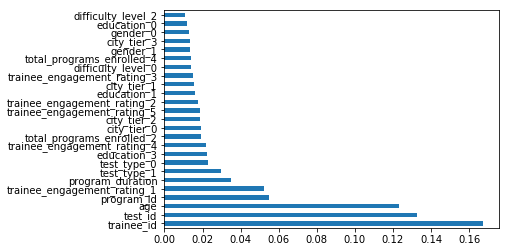

In [127]:
feature_importance = pd.Series(rf.feature_importances_,index=x_train.columns[0:50])
feature_importance = feature_importance.nlargest(25)
import matplotlib.pyplot as plt
%matplotlib inline
feature_importance.plot(kind='barh')

In [128]:
feature_importance

trainee_id                     0.167466
test_id                        0.132783
age                            0.123449
program_id                     0.055079
trainee_engagement_rating_1    0.052118
program_duration               0.034736
test_type_1                    0.029800
test_type_0                    0.022700
education_3                    0.022136
trainee_engagement_rating_4    0.021851
total_programs_enrolled_2      0.019457
city_tier_0                    0.019231
city_tier_2                    0.018619
trainee_engagement_rating_5    0.018507
trainee_engagement_rating_2    0.017769
education_1                    0.016224
city_tier_1                    0.015488
trainee_engagement_rating_3    0.014805
difficulty_level_0             0.013970
total_programs_enrolled_4      0.013860
gender_1                       0.013433
city_tier_3                    0.013266
gender_0                       0.013012
education_0                    0.012033
difficulty_level_2             0.011055


In [139]:
d=data_dum1.loc[:,['trainee_id','test_id','age','program_id','trainee_engagement_rating_1','program_duration','test_type_1','test_type_0','education_3','trainee_engagement_rating_4','total_programs_enrolled_2','city_tier_0','city_tier_2','trainee_engagement_rating_5','trainee_engagement_rating_2','education_1','city_tier_1']]

In [165]:
d.shape

(31349, 14)

In [140]:
x=d
y=data.loc[:,'is_pass']

In [141]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=45)

In [142]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, cohen_kappa_score, accuracy_score,roc_auc_score
rf = RandomForestClassifier(n_estimators=150,criterion='entropy', min_samples_leaf=5)
rf.fit(x_train,y_train)
y_pred=rf.predict(X=x_test)
y_pred
print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

0.732877648667
0.621424635509


In [144]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
kfold = model_selection.KFold(n_splits=10, random_state=10)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=10)
results = model_selection.cross_val_score(model, x, y, cv=kfold)
model.fit(x_train,y_train)
y_pred=model.predict(X=x_test)
print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

0.737320574163
0.658340776779


In [145]:
model1=BaggingClassifier(RandomForestClassifier(), n_estimators=150, random_state=10)
model1.fit(x_train,y_train)
y_pred=model1.predict(X=x_test)
print(accuracy_score(y_test,y_pred))
print(roc_auc_score(y_test,y_pred))

0.733356117567
0.632320944101


In [146]:
from sklearn import naive_bayes
nb_classifier = naive_bayes.GaussianNB()
nb_classifier.fit(X=x_train, y=y_train)
y_pred_nb=nb_classifier.predict(X=x_test)
print(roc_auc_score(y_test,y_pred_nb))
print(accuracy_score(y_test,y_pred_nb))
print(confusion_matrix(y_test,y_pred_nb))
print(cohen_kappa_score(y_test,y_pred_nb))
print(accuracy_score(y_test,y_pred_nb))

0.611197934501
0.642857142857
[[2371 2106]
 [3119 7034]]
0.209166690375
0.642857142857


In [147]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=lf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
gbc.fit(x_train, y_train)
y_pred_gbc=gbc.predict(X=x_test)
print(roc_auc_score(y_test,y_pred_gbc))
print(accuracy_score(y_test,y_pred_gbc))
print(confusion_matrix(y_test,y_pred_gbc))
print(cohen_kappa_score(y_test,y_pred_gbc))

0.576339620514
0.712850307587
[[1005 3472]
 [ 729 9424]]
0.184230636368


In [148]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
adb=AdaBoostClassifier(base_estimator=cart, n_estimators=num_trees, random_state=10)
adb.fit(X=x_train, y=y_train)
y_pred_adb=adb.predict(X=x_test)
print(roc_auc_score(y_test,y_pred_adb))
print(accuracy_score(y_test,y_pred_adb))
print(confusion_matrix(y_test,y_pred_adb))
print(cohen_kappa_score(y_test,y_pred_adb))
print(accuracy_score(y_test,y_pred_adb))

0.620144588775
0.675119617225
[[2142 2335]
 [2418 7735]]
0.239050385381
0.675119617225


In [150]:
data_test=pd.read_csv(r"E:\Praxis-BA-18\Term-1\ML\hackathan-AV-15.5.18\test.csv")

In [170]:
d_n=pd.read_csv(r"E:\Praxis-BA-18\Term-1\ML\hackathan-AV-15.5.18\test.csv")

In [151]:
data_test=data_test.drop('id',axis=1)

In [152]:
data_test['test_type']=le.fit_transform(data_test['test_type'])
data_test['difficulty_level']=le.fit_transform(data_test['difficulty_level'])
data_test['gender']=le.fit_transform(data_test['gender'])
data_test['education']=le.fit_transform(data_test['education'])
data_test['city_tier']=le.fit_transform(data_test['city_tier'])
data_test['is_handicapped']=le.fit_transform(data_test['is_handicapped'])
data_test['program_id']=le.fit_transform(data_test['program_id'])
data_test['program_type']=le.fit_transform(data_test['program_type'])

In [153]:
df2=fai.complete(data_test)


In [159]:
d=pd.DataFrame(df2)
d=d.apply(np.int64)

In [160]:
var1=['program_id','program_type','program_duration','test_id','test_type','difficulty_level','trainee_id','gender','education','city_tier','age','total_programs_enrolled','is_handicapped','trainee_engagement_rating']
d.columns=var1

In [161]:
data_dum2=pd.get_dummies(data=d,columns=['program_type','test_type','difficulty_level','gender','education','city_tier','total_programs_enrolled','is_handicapped','trainee_engagement_rating'])
data_dum2=data_dum2.apply(np.int64)

In [162]:
data_dum2.isnull().sum()

program_id                     0
program_duration               0
test_id                        0
trainee_id                     0
age                            0
program_type_0                 0
program_type_1                 0
program_type_2                 0
program_type_3                 0
program_type_4                 0
program_type_5                 0
program_type_6                 0
test_type_0                    0
test_type_1                    0
difficulty_level_0             0
difficulty_level_1             0
difficulty_level_2             0
difficulty_level_3             0
gender_0                       0
gender_1                       0
education_0                    0
education_1                    0
education_2                    0
education_3                    0
education_4                    0
city_tier_0                    0
city_tier_1                    0
city_tier_2                    0
city_tier_3                    0
total_programs_enrolled_1      0
total_prog

In [163]:
data_n=data_dum2.loc[:,['trainee_id','test_id','age','program_id','trainee_engagement_rating_1','program_duration','test_type_1','test_type_0','education_3','trainee_engagement_rating_4','total_programs_enrolled_2','city_tier_0','city_tier_2','trainee_engagement_rating_5','trainee_engagement_rating_2','education_1','city_tier_1']]

In [164]:
data_n.shape

(31349, 17)

In [174]:
gb_pred1=model.predict(data_n)

In [175]:
gb_pred1=pd.Series(gb_pred1)

In [176]:
gb_pred1.head()

0    1
1    1
2    1
3    0
4    1
dtype: int64

In [177]:
d_n['is_pass']=pd.Series(gb_pred1)
d_n['is_pass']=d4.loc[:,['is_pass']]


subm_data=d_n.loc[:,['id','is_pass']]

In [178]:
subm_data.head()

,id,is_pass
0,1626_45,1.0
1,11020_130,1.0
2,12652_146,1.0
3,7038_72,0.0
4,888_71,1.0


In [179]:
subm_data.to_csv(r"E:\Praxis-BA-18\Term-1\ML\hackathan-AV-15.5.18\submission.csv")